In [1]:
from sklearn.datasets import make_classification, make_moons, make_circles
import matplotlib.pyplot as plt
import numpy as np

In [2]:
"""
n_samples     = 200 örnek
n_features    = 2 : her örnek 2 feature sahip
n_informative = 2 : Bu 2 özelliğin ikisi de sınıfı ayırt edebilen anlamlı bilgi içersin.
n_redundant   = 0 :	Hiçbir özellik, diğerinden kopyalanmış ya da türetilmiş olmasın.
"""
X, y = make_classification(n_samples = 100, n_features = 2, n_informative = 2, n_redundant = 0, n_clusters_per_class = 2, random_state = 42)

"""
X.shape -> (200,2)
0-1 arasında (200,2) şeklinde random değerler oluşturulur ve X'e eklenir.
"""
X += np.random.uniform(low = 0.0, high = 1.0, size = X.shape)

In [3]:
Xy = (X, y)
datasets = [(Xy),
            make_moons(n_samples = 100, noise = 0.1),
            make_circles(n_samples = 100, noise = 0.1, factor = 0.3)]

/tmp/ipython-input-4-1759218981.py:6: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


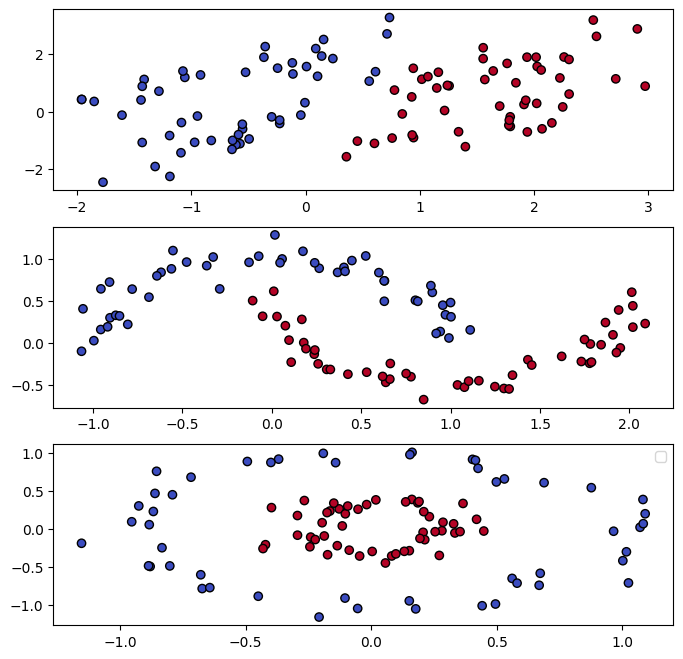

In [4]:
plt.figure(figsize=(8,8))
for i, dataset in enumerate(datasets):
  X, y = dataset
  plt.subplot(len(datasets), 1, i+1)
  plt.scatter(X[:, 0], X[:, 1], c = y, cmap = plt.cm.coolwarm, edgecolors = "black")
plt.legend()

In [5]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

In [6]:
from sklearn.model_selection import train_test_split
from matplotlib.colors import ListedColormap
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.inspection import DecisionBoundaryDisplay

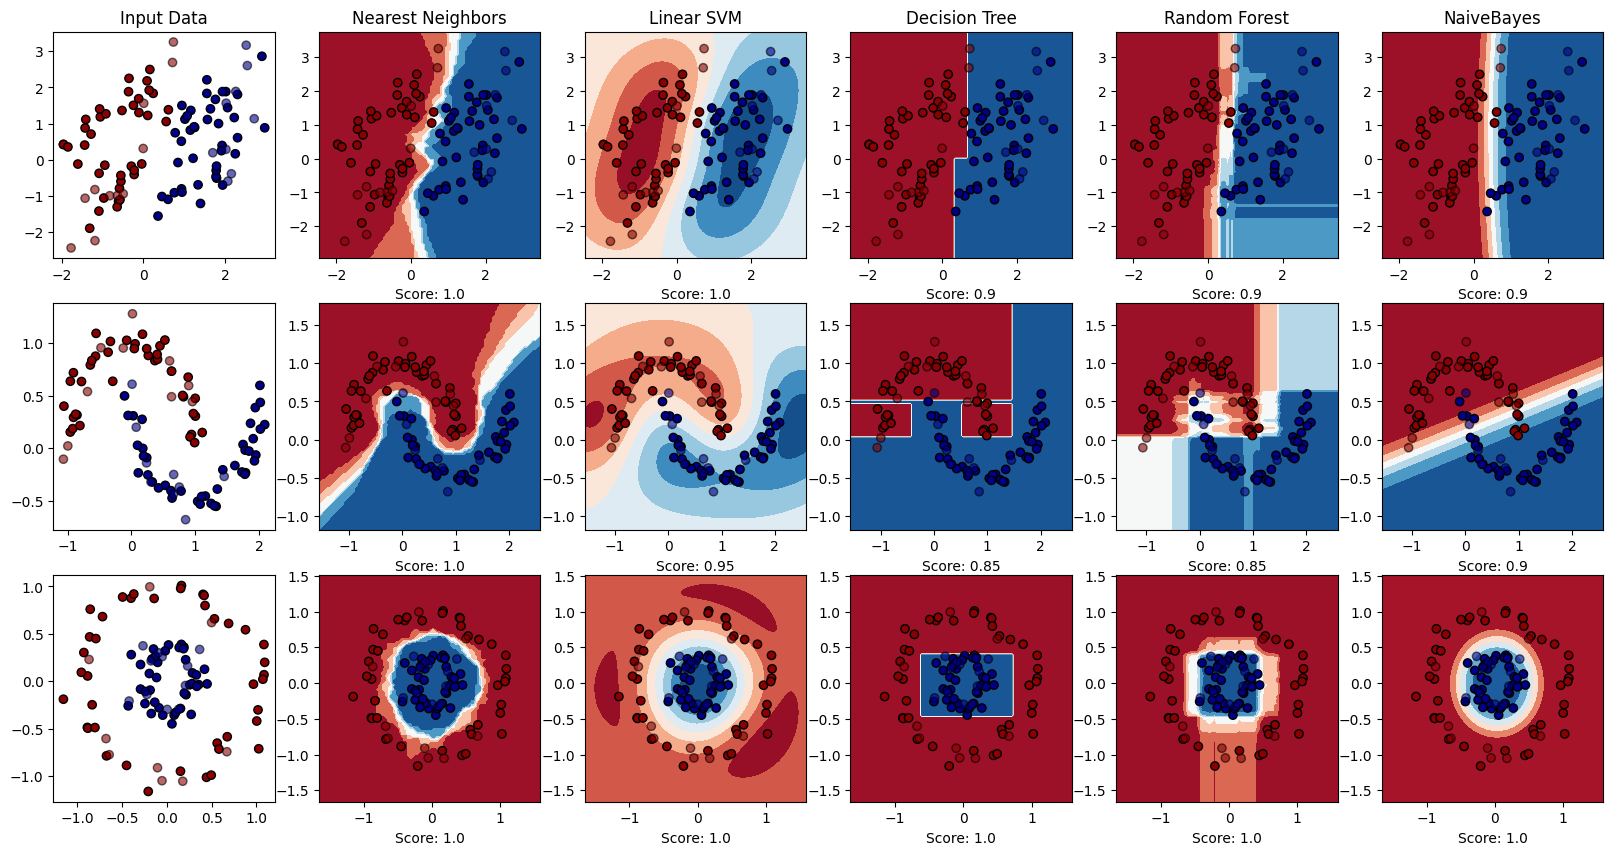

In [25]:
names = ["Nearest Neighbors", "Linear SVM", "Decision Tree", "Random Forest", "NaiveBayes"]
classifiers = [KNeighborsClassifier(), SVC(), DecisionTreeClassifier(), RandomForestClassifier(), GaussianNB()]

i = 1
fig = plt.figure(figsize = (20,10))
for ds_count, dataset in enumerate(datasets):
  X, y = dataset
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
  cm_bright = ListedColormap(["darkred", "darkblue"])
  ax = plt.subplot(len(datasets), len(classifiers)+1, i)
  if ds_count == 0:
    ax.set_title("Input Data")

  ax = plt.subplot(len(datasets), len(classifiers)+1, i)
  ax.scatter(X_train[:, 0], X_train[:, 1], c = y_train, cmap = cm_bright, edgecolors = "black")
  ax.scatter(X_test[:, 0], X_test[:, 1], c = y_test, cmap = cm_bright, edgecolors = "black", alpha = 0.6)
  i += 1

  for name, clf in zip(names, classifiers):
    ax = plt.subplot(len(datasets), len(classifiers)+1, i)
    clf = make_pipeline(StandardScaler(), clf)
    clf.fit(X_train, y_train)
    score = clf.score(X_test ,y_test)
    DecisionBoundaryDisplay.from_estimator(estimator = clf, X = X, cmap = plt.cm.RdBu, ax = ax, eps = 0.5, xlabel = f"Score: {score}")
    if ds_count == 0:
      ax.set_title(name)

    ax.scatter(X_train[:, 0], X_train[:, 1], c = y_train, cmap = cm_bright, edgecolors="black")
    ax.scatter(X_test[:, 0], X_test[:, 1], c = y_test, cmap = cm_bright, edgecolors = "black", alpha = 0.6)

    i += 1